# Lecture 1. Matrix-Vector Multiplication

## Matrix times vector

A matrix right-multiplied by a column vector---that is, $\mathbf{A}\mathbf{x}$---is a linear combination of the columns of $\mathbf{A}$, with coefficients of the combination given by the entries of $\mathbf{x}$. For example,

In [1]:
A = magic(3), x = [-1;2;1]

A =

     8     1     6
     3     5     7
     4     9     2


x =

    -1
     2
     1


In [2]:
A*x

ans =

     0
    14
    16


In [3]:
x(1)*A(:,1) + x(2)*A(:,2) + x(3)*A(:,3)

ans =

     0
    14
    16


In this context it's clear why the number of entries in $\mathbf{x}$ has to be the same as the number of columns in $\mathbf{A}$.

If you left-multiply a matrix by a vector, it should be a row vector. I'll be using column vectors exclusively, so we have to transpose (or conjugate transpose) to get the row shape. Transposition of the product also makes the interpretation clear:

$$
\mathbf{y}^* \mathbf{A} = \bigl( \mathbf{A}^* \mathbf{y}\bigr)^*,
$$

which is the (conjugate) transpose of the columns of $\mathbf{A}^*$, i.e., the rows of $\mathbf{A}$.

Linear algebra, including abstract linear algebra, is built in large part on linear combinations. The vectors that one combines need not be ordinary vectors in $\mathbb{C}^n$. For instance, a polynomial is a linear combination of monomials. We can encompasss this fact too by generalizing the notion of a "matrix":

$$
c_0 + c_1 t + \cdots c_n t^n = \begin{bmatrix} 1 & t & \cdots & t^n \end{bmatrix} \begin{bmatrix}c_0 \\ c_1 \\ \vdots \\ c_n \end{bmatrix}.
$$

The "matrix" here is sometimes called a *quasimatrix*. From here it's a small step to imagine choosing many values of $t$ in an interval and converting the quasimatrix into a proper matrix. This is easy to carry out in MATLAB.

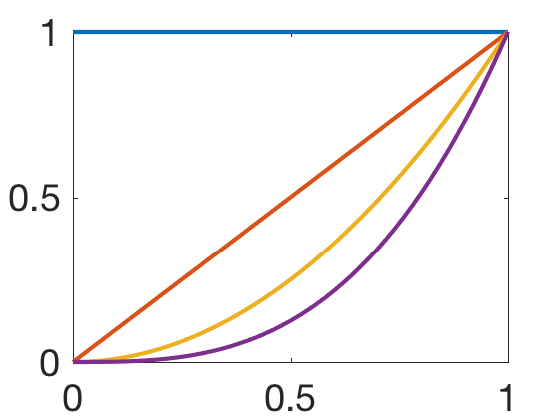

In [6]:
V = zeros(51,4);  % not strictly necessary
t = linspace(0,1,51)'; 
for j = 0:3, V(:,j+1) = t.^j; end
plot(t,V)

## Matrix times matrix

It's often useful to think of a matrix-matrix product as a collection of matrix-vector products. For example,

In [7]:
A = magic(4); B = triu(ones(4,3)); 
C = A*B

C =

    16    18    21
     5    16    26
     9    16    22
     4    18    33


In [8]:
[ A*B(:,1), A*B(:,2), A*B(:,3) ]

ans =

    16    18    21
     5    16    26
     9    16    22
     4    18    33


Hence the number of rows in $\mathbf{B}$ has to be the same as the number of columns in $\mathbf{A}$. In the special case where that number is 1, then $\mathbf{A}$ is a column vector and $\mathbf{B}$ is a row vector, and the result is called a **vector outer product**. 

In [9]:
u = [ 1; 2; 3; 4 ];  v = [ 1i -1i 1 ];
size(u), size(v)

ans =

     4     1


ans =

     1     3


In [10]:
u*v

ans =

   0.0000 + 1.0000i   0.0000 - 1.0000i   1.0000 + 0.0000i
   0.0000 + 2.0000i   0.0000 - 2.0000i   2.0000 + 0.0000i
   0.0000 + 3.0000i   0.0000 - 3.0000i   3.0000 + 0.0000i
   0.0000 + 4.0000i   0.0000 - 4.0000i   4.0000 + 0.0000i


## Rank and inverse

The rank and inverse of a matrix are of critical importance in linear algebra. It's important to be aware, however, that they are not robust to perturbations. For example, it should be clear that this matrix is singular and of rank 1.

In [19]:
A = [ 0 1; 0 0 ]
rank(A)

A =
     0     1
     0     0
ans =
     1


However, any perturbation of the second row, no matter how small, mathematically changes the rank to 2 and thus makes the matrix invertible.

In [21]:
format short e
B = A + [0 0; 1e-12 0 ]
rank(B)

B =
            0   1.0000e+00
   1.0000e-12            0
ans =
     2


In numerical computation, representation of and arithmetic with real numbers cannot be exact. Therefore, the notions of rank and invertibility will have to be carefully reconsidered. In fact, it's questionable as to whether you should ever compute a matrix rank in finite precision.  

## Change of basis

In linear algebra one learns that a matrix is the expression of a linear transformation relative to a particular basis. Unless stated otherwise, when we write out the numerical values of a matrix, we have chosen the standard basis, whose elements are the columns of an identity matrix. 

Say we have a basis whose elements, when expressed in the standard basis, are the columns of a square matrix $\mathbf{A}$. Let a vector $\mathbf{v}$ be given as coordinates $x_1,x_2,\ldots$ in that basis. Then we can convert the coordinates of $\mathbf{v}$ to standard by matrix--vector multiplication:

In [22]:
A = magic(3);  x = [ -1; 1; 2 ];
v_standard = A*x

v_standard =
     5
    16
     9


Consequently, we can convert a vector from standard coordinates to the "$\mathbf{A}$-basis" through multiplication by $\mathbf{A}^{-1}$. 

In [23]:
v_Abasis = A^(-1) * v_standard

v_Abasis =
  -1.0000e+00
   1.0000e+00
   2.0000e+00


Note that while `A^(-1)*` works in MATLAB, *it is not recommended*, for reasons we will go into later. A mathematically equivalent but computationally preferable syntax is to use `A\` instead.

In [24]:
v_Abasis = A \ v_standard

v_Abasis =
    -1
     1
     2
